In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import argrelextrema

In [3]:
%matplotlib inline
import pylab as pl

In [4]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [5]:
import math

In [6]:
from sklearn.cluster import KMeans
from src2.utils import *

In [7]:
def add_labels(x_list, y_list, labels):
    for x,y,label in zip(x_list, y_list, labels):
        plt.text(x+0.25, y-0.25, label)

In [8]:
def make_test_data(seg_count, point_count):
    x = np.random.uniform(2, 10, seg_count)
    x = np.cumsum(x)
    x *= 10 / x.max()
    y = np.cumsum(np.random.uniform(-1, 1, seg_count))
    X = np.random.uniform(0, 10, point_count)
    Y = np.interp(X, x, y) + np.random.normal(0, 0.05, point_count)
    return X, Y

In [9]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

In [10]:
df=pd.read_csv("./sensor.csv")
df["Timestamp"] = pd.to_datetime(df["timestamp"])
df_gb = df.groupby(pd.Grouper(key="Timestamp", axis=0, freq="D")).mean()
df_gb.reset_index(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

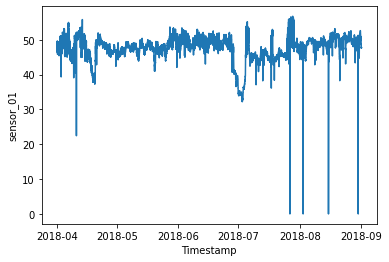

In [11]:
sns.lineplot(x="Timestamp", y="sensor_01", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

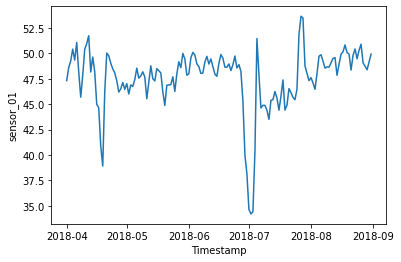

In [12]:
sns.lineplot(x="Timestamp", y="sensor_01", data=df_gb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

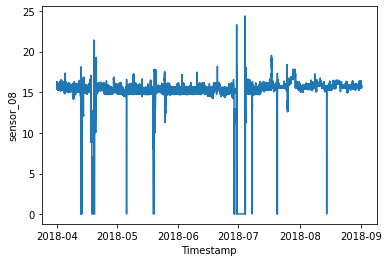

In [13]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

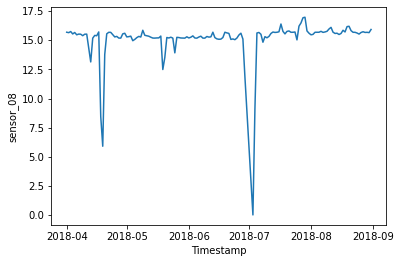

In [14]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df_gb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

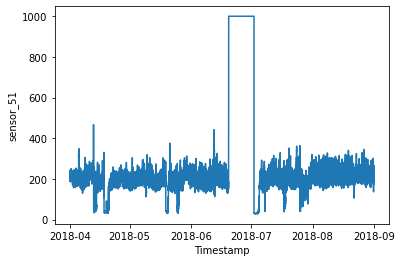

In [15]:
sns.lineplot(x="Timestamp", y="sensor_51", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

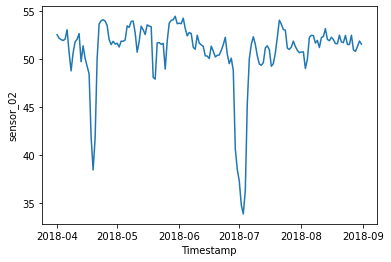

In [92]:
sns.lineplot(x="Timestamp", y="sensor_02", data=df_gb)
plt.show

In [16]:
# loess sensor 1

<function matplotlib.pyplot.show(close=None, block=None)>

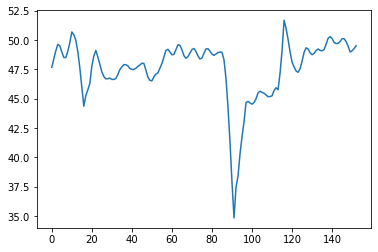

In [93]:
x1=pd.to_numeric(df_gb.index)
y1=pd.to_numeric(df_gb.sensor_01)
result1 = lowess(y1, x1, frac=0.05, it=3, delta=0.0)
ar1 =[]
for i in range(len(result1[0])):
    b =[]
    for j in range(len(result1)):
        b.append(result1[j][i])
    ar1.append(b)
sns.lineplot(x=ar1[0], y=ar1[1])
plt.show

In [18]:
# loess sensor8

<function matplotlib.pyplot.show(close=None, block=None)>

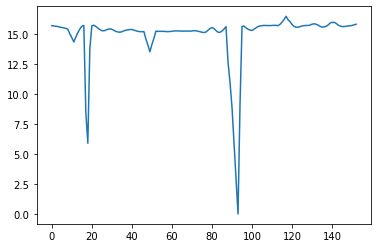

In [19]:
x8=pd.to_numeric(df_gb.index)
y8=pd.to_numeric(df_gb.sensor_08)
result8 = lowess(y8, x8, frac=0.05, it=3, delta=0.0)
ar8 =[]
for i in range(len(result8[0])):
    b =[]
    for j in range(len(result8)):
        b.append(result8[j][i])
    ar8.append(b)
sns.lineplot(x=ar8[0], y=ar8[1])
plt.show

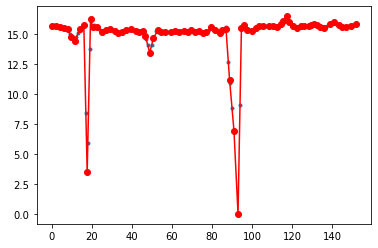

In [20]:
y8[y8.isnull()] = 0
ya8 = np.array(y8.values.tolist())
maxs8 = list(argrelextrema(ya8, np.greater)[0])
mins8 = list(argrelextrema(ya8, np.less)[0])
extreme8 = maxs8+mins8
extreme_single8 = list({d:None for d in extreme8}.keys())
px8, py8 = segments_fit(np.array(ar8[0]), np.array(ar8[1]), len(extreme_single8))
pl.plot(np.array(ar8[0]), np.array(ar8[1]), ".")
pl.plot(px8, py8, "-or")

In [21]:
# lpx8 = list(px8)
# lpy8 = list(py8)
# lstate8=[]
# for i in range(len(lpx8)-1):
#     lstate8.append(np.arccos((lpy8[i+1]-lpy8[i])/((lpx8[i+1]-lpx8[i])*10)))

In [22]:
# quali_state8 = []
# colors8 = []
# for i in lstate8 : 
#     if 0<i<math.pi/6:
#         quali_state8.append(0)
#         colors8.append("red")
#     elif math.pi/6<i<2*math.pi/6:
#         quali_state8.append(1)
#         colors8.append("orange")
#     elif 2*math.pi/6<i<3*math.pi/6:
#         quali_state8.append(2)
#         colors8.append("yellow")
#     elif 3*math.pi/6<i<4*math.pi/6:
#         quali_state8.append(3)
#         colors8.append("cornflowerblue")
#     elif 4*math.pi/6<i<5*math.pi/6:
#         quali_state8.append(4)
#         colors8.append("blue")
#     elif 5*math.pi/6<i<6*math.pi/6:
#         quali_state8.append(5)
#         colors8.append("violet")
#     else:
#         quali_state8.append(6)
#         colors8.append("tomato")
# df_state8 = pd.DataFrame({'val_ongle': pd.Series(lstate8), 'state': pd.Series(quali_state8)})
# df_state8

In [23]:
# tab_proba8 = []
# for i in range(7):
#     tab_proba8.append([])
# for i in range(7):    
#     for j in range(7):
#         tab_proba8[i].append(0)
# for i in range(len(df_state8["state"])-1):
#     a=df_state8["state"][i]
#     b=df_state8["state"][i+1]
#     tab_proba8[a][b]=tab_proba8[a][b]+1
# tab_proba8

In [24]:
# pl.plot(np.array(ar8[0]), np.array(ar8[1]), ".")
# pl.plot(px8, py8, "-or")
# pl.plot(px8[:-1], colors8, ".")

In [25]:
# train data

In [26]:
#classification : kmeans

In [27]:
tab_dis8 = []
for i in range(len(ar8[0])):
    tab_dis8.append([])
for i in range(len(ar8[0])):    
    for j in range(len(ar8[1])):
        tab_dis8[i].append([])
for i in range(len(ar8[0])):
    for j in range(len(ar8[1])):
        tab_dis8[i][j] = abs(ar8[1][i] - ar8[1][j] )
df_dist8 = pd.DataFrame(tab_dis8)
df_dist8

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.000000,0.022099,0.046242,0.068917,0.119625,0.150154,0.185742,0.225141,0.291134,0.677207,...,0.055582,0.030789,0.071418,0.071046,0.051974,0.023103,0.010801,0.023241,0.069943,0.120565
1,0.022099,0.000000,0.024142,0.046818,0.097526,0.128055,0.163643,0.203041,0.269034,0.655107,...,0.077682,0.008690,0.049318,0.048946,0.029875,0.001004,0.011299,0.045341,0.092042,0.142664
2,0.046242,0.024142,0.000000,0.022675,0.073384,0.103912,0.139501,0.178899,0.244892,0.630965,...,0.101824,0.015453,0.025176,0.024804,0.005733,0.023139,0.035441,0.069483,0.116185,0.166807
3,0.068917,0.046818,0.022675,0.000000,0.050708,0.081237,0.116825,0.156223,0.222217,0.608289,...,0.124499,0.038128,0.002500,0.002129,0.016943,0.045814,0.058117,0.092159,0.138860,0.189482
4,0.119625,0.097526,0.073384,0.050708,0.000000,0.030529,0.066117,0.105515,0.171508,0.557581,...,0.175208,0.088836,0.048208,0.048580,0.067651,0.096522,0.108825,0.142867,0.189568,0.240191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.023103,0.001004,0.023139,0.045814,0.096522,0.127051,0.162639,0.202037,0.268031,0.654103,...,0.078685,0.007686,0.048314,0.047943,0.028871,0.000000,0.012303,0.046344,0.093046,0.143668
147,0.010801,0.011299,0.035441,0.058117,0.108825,0.139353,0.174942,0.214340,0.280333,0.666406,...,0.066383,0.019989,0.060617,0.060245,0.041174,0.012303,0.000000,0.034042,0.080744,0.131366
148,0.023241,0.045341,0.069483,0.092159,0.142867,0.173395,0.208984,0.248382,0.314375,0.700448,...,0.032341,0.054031,0.094659,0.094287,0.075216,0.046344,0.034042,0.000000,0.046702,0.097324
149,0.069943,0.092042,0.116185,0.138860,0.189568,0.220097,0.255685,0.295084,0.361077,0.747150,...,0.014361,0.100732,0.141361,0.140989,0.121917,0.093046,0.080744,0.046702,0.000000,0.050622


In [28]:
cls = KMeans(n_clusters=3, init="random")
cls.fit(df_dist8)
labels_k = pd.Series(cls.labels_, name="K-means")
n1=len(labels_k[labels_k==0])
n2=len(labels_k[labels_k==1])
n3=len(labels_k[labels_k==2])
if n1 > max(n2,n3):
    labels_k[labels_k==0] = 4
    if n2 > n3:
        labels_k[labels_k==1] = 5
        labels_k[labels_k==2] = 6
    else:
        labels_k[labels_k==1] = 6
        labels_k[labels_k==2] = 5
elif n2 > max(n1,n3):
    labels_k[labels_k==1] = 4
    if n1 > n3:
        labels_k[labels_k==0] = 5
        labels_k[labels_k==2] = 6
    else:
        labels_k[labels_k==0] = 6
        labels_k[labels_k==2] = 5
else:
    labels_k[labels_k==3] = 4
    if n1 > n2:
        labels_k[labels_k==0] = 5
        labels_k[labels_k==1] = 6
    else:
        labels_k[labels_k==0] = 6
        labels_k[labels_k==1] = 5

In [29]:
labels_k[labels_k==4] = 0
labels_k[labels_k==5] = 1
labels_k[labels_k==6] = 2

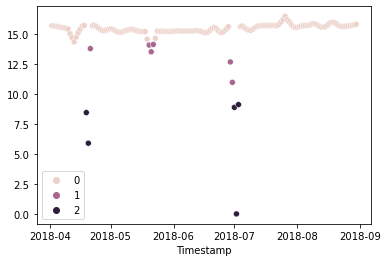

In [30]:
list_labels_k = labels_k.to_list()
sns.scatterplot(x = df_gb["Timestamp"][1:-1], y=ar8[1], hue=list_labels_k)
plt.show()

In [31]:
# cls = KMeans(n_clusters=5, init="random")
# cls.fit(df_dist8)
# labels_k = pd.Series(cls.labels_, name="K-means")
# list_labels_k = labels_k.to_list()
# sns.scatterplot(x = df_gb["Timestamp"][1:-1], y=ar8[1], hue=list_labels_k)
# plt.show()

In [32]:
#transition matrix for markovain

In [33]:
tab_proba=[]
for i in range(3):
    tab_proba.append([])
for i in range(3):    
    for j in range(3):
        tab_proba[i].append(0)
tab_proba

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [34]:
for i in range(len(labels_k)-1) : 
    a=labels_k[i]
    b=labels_k[i+1]
    tab_proba[a][b] = tab_proba[a][b]+1 
for i in range(3):
    sum_ligne = sum(tab_proba[i])
for j in range(3):
    tab_proba[i][j] = tab_proba[i][j]/sum_ligne 
tab_proba

[[136, 2, 1], [2, 3, 1], [0.2, 0.2, 0.6]]

In [35]:
transitionMatrix=tab_proba
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")


Somewhere, something went wrong. Transition matrix, perhaps?


In [36]:
def trouver_transitionMatrix(array_labels,dim):
    tab_proba=[]
    for i in range(dim):
        tab_proba.append([])
    for i in range(dim):    
        for j in range(dim):
            tab_proba[i].append(0)
    
    for i in range(len(array_labels)-1) : 
        a=array_labels[i]
        b=array_labels[i+1]
        tab_proba[a][b] = tab_proba[a][b]+1 
    for i in range(dim):
        sum_ligne = sum(tab_proba[i])
        for j in range(dim):
            tab_proba[i][j] = tab_proba[i][j]/sum_ligne
    return tab_proba

In [70]:
def calculate_list_state(string_nom_sensor):
    # lowess
    x=pd.to_numeric(df_gb.index)
    y=pd.to_numeric(df_gb[string_nom_sensor])
    result = lowess(y, x, frac=0.05, it=3, delta=0.0)
    ar =[]
    for i in range(len(result[0])):
        b =[]
        for j in range(len(result)):
            b.append(result[j][i])
        ar.append(b)
    #matrix distance
    tab_dist = []
    for i in range(len(ar[0])):
        tab_dist.append([])
    for i in range(len(ar[0])):    
        for j in range(len(ar[1])):
            tab_dist[i].append([])
    for i in range(len(ar[0])):
        for j in range(len(ar[1])):
            tab_dist[i][j] = abs(ar[1][i] - ar[1][j] )
    #cliassification : k-means
    cls = KMeans(n_clusters=3, init="random")
    cls.fit(tab_dist)
    labels_k = pd.Series(cls.labels_, name="K-means")
    # classer de nb plus à moins(proba plus : normal -> abnormal)
    n1=len(labels_k[labels_k==0])
    n2=len(labels_k[labels_k==1])
    n3=len(labels_k[labels_k==2])
    if n1 > max(n2,n3):
        labels_k[labels_k==0] = 4
        if n2 > n3:
            labels_k[labels_k==1] = 5
            labels_k[labels_k==2] = 6
        else:
            labels_k[labels_k==1] = 6
            labels_k[labels_k==2] = 5
    elif n2 > max(n1,n3):
        labels_k[labels_k==1] = 4
        if n1 > n3:
            labels_k[labels_k==0] = 5
            labels_k[labels_k==2] = 6
        else:
            labels_k[labels_k==0] = 6
            labels_k[labels_k==2] = 5
    else:
        labels_k[labels_k==3] = 4
        if n1 > n2:
            labels_k[labels_k==0] = 5
            labels_k[labels_k==1] = 6
        else:
            labels_k[labels_k==0] = 6
            labels_k[labels_k==1] = 5
    list_labels_k = []
    labels_k[labels_k==4] = 0
    labels_k[labels_k==5] = 1
    labels_k[labels_k==6] = 2
    #to list
    # list_labels_k = labels_k.to_list()
    return labels_k,ar # list state for this sensor

In [71]:
a=2

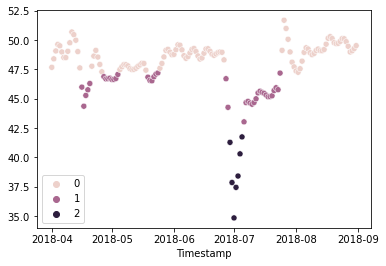

In [72]:
state_sensor1,valeur_lowess_sensor1 = calculate_list_state("sensor_01")
list_state_sensor1 = state_sensor1.to_list()
sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor1[1], hue=list_state_sensor1)
plt.show()

In [73]:
transitionMatrix1 = trouver_transitionMatrix(state_sensor1,3)
transitionMatrix1

[[0.9619047619047619, 0.0380952380952381, 0.0],
 [0.1, 0.875, 0.025],
 [0.0, 0.14285714285714285, 0.8571428571428571]]

In [74]:
if sum(transitionMatrix1[0])+sum(transitionMatrix1[1])+sum(transitionMatrix1[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [75]:
a=1

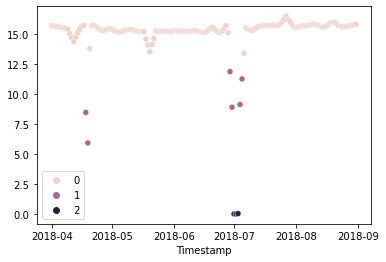

In [76]:
state_sensor8,valeur_lowess_sensor8 = calculate_list_state("sensor_08")
list_state_sensor8 = state_sensor8.to_list()
sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor8[1], hue=list_state_sensor8)
plt.show()

In [77]:
state_sensor1

0      0
1      0
2      0
3      0
4      0
      ..
148    0
149    0
150    0
151    0
152    0
Name: K-means, Length: 153, dtype: int32

In [78]:
state_sensor8

0      0
1      0
2      0
3      0
4      0
      ..
148    0
149    0
150    0
151    0
152    0
Name: K-means, Length: 153, dtype: int32

In [79]:
transitionMatrix8 = trouver_transitionMatrix(state_sensor8,3)
transitionMatrix8

[[0.986013986013986, 0.013986013986013986, 0.0],
 [0.3333333333333333, 0.5, 0.16666666666666666],
 [0.0, 0.3333333333333333, 0.6666666666666666]]

In [80]:
if sum(transitionMatrix8[0])+sum(transitionMatrix8[1])+sum(transitionMatrix8[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [81]:
# train data : transitionMatrix8

In [82]:
# test data : list_state_sensor1

In [83]:
transitionMatrix8

[[0.986013986013986, 0.013986013986013986, 0.0],
 [0.3333333333333333, 0.5, 0.16666666666666666],
 [0.0, 0.3333333333333333, 0.6666666666666666]]

In [84]:
# tab_pb_res1=[]
# for i in range(len(list_state_sensor1)):
#     tab_pb_res1.append(1)
# # tab_pb_res1

In [85]:
# for i in range(len(list_state_sensor1)-5) :
#     nb_proba = 1
#     for j in range(5) :
#         nb_proba = nb_proba * transitionMatrix8[list_state_sensor1[i+j]][list_state_sensor1[i+j+1]]
#     tab_pb_res1[i+j+1] = nb_proba
# # tab_pb_res1

In [86]:
# tab_label  = []
# for i in tab_pb_res1:
#     if i > 0.5:
#         tab_label.append("OK")
#     else :
#         tab_label.append("Erreur")
# # tab_label

In [87]:
# sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor1[1], hue=tab_label)
# plt.show()

In [88]:
def trouver_tabres_proba_markovain(list_state_sensor_but, transitionMatrix):
    tab_pb_res=[]
    for i in range(len(list_state_sensor_but)):
        tab_pb_res.append(1)
    for i in range(len(list_state_sensor_but)-5) :
        nb_proba = 1
        for j in range(5) :
            nb_proba = nb_proba * transitionMatrix[list_state_sensor_but[i+j]][list_state_sensor_but[i+j+1]]
        tab_pb_res[i+j+1] = nb_proba
    return tab_pb_res

In [89]:
def trouver_OK_Erreur_Label(tab_pb_res):
    tab_label  = []
    for i in tab_pb_res:
        if i > 0.5:
            tab_label.append("OK")
        else :
            tab_label.append("Erreur")
    return tab_label

In [90]:
tab_pb_res1 = trouver_tabres_proba_markovain(list_state_sensor1,transitionMatrix8)
tab_label1 = trouver_OK_Erreur_Label(tab_pb_res1)

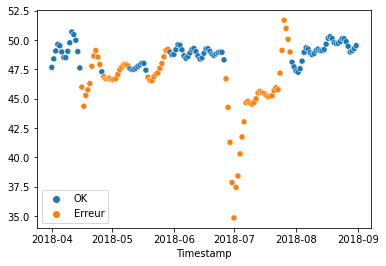

In [91]:
sns.scatterplot(x = df_gb["Timestamp"], y=valeur_lowess_sensor1[1], hue=tab_label1)
plt.show()

In [96]:
# it's possible that it has some errors of lance in first time 
# it's not problem of logique, it's ptoblem of stockage or else that i don't realy understand
# try seconde time and it could go on
def M_markovain(nom_train_data,nom_test_data): 
    state_sensor_train,valeur_lowess_sensor_train = calculate_list_state(nom_train_data)
    list_state_sensor_train = state_sensor_train.to_list()
    
    state_sensor_test,valeur_lowess_sensor_test = calculate_list_state(nom_test_data)
    list_state_sensor_test = state_sensor_test.to_list()
    
    transitionMatrix = trouver_transitionMatrix(state_sensor_train,3)
    
    tab_pb_res = trouver_tabres_proba_markovain(list_state_sensor_test,transitionMatrix)
    tab_label_res = trouver_OK_Erreur_Label(tab_pb_res)
    
    sns.scatterplot(x = valeur_lowess_sensor_test[0], y=valeur_lowess_sensor_test[1], hue=tab_label_res)
    plt.show()

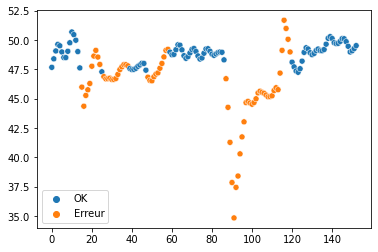

In [99]:
M_markovain("sensor_08","sensor_01")

In [55]:
list_state_sensor1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [56]:
# transitionName = [["S00","S01","S02"],["S10","S11","S12"],["S20","S21","S22"]]

In [57]:
# def activity_forecast(list_state):
#     # Choose the starting state
#     activityNOW = list_state[0]
#     activityList = [activityNOW]
#     i = 0
#     prob = 1
#     while i != len(list_state):
#         if activityToday == 0:
#             change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
#             if change == "01":
#                 prob = prob * transitionMatrix[0][0]
#                 activityToday = 0
#                 activityList.append(0)
#                 pass
#             elif change == "02":
#                 prob = prob * transitionMatrix[0][1]
#                 activityToday = 1
#                 activityList.append(1)
#             else:
#                 prob = prob * transitionMatrix[0][2]
#                 activityToday = 2
#                 activityList.append(2)
#         elif activityToday == 1:
#             change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
#             if change == "10":
#                 prob = prob * transitionMatrix[1][0]
#                 activityToday = 0
#                 activityList.append(0)
#                 pass
#             elif change == "11":
#                 prob = prob * transitionMatrix[1][1]
#                 activityToday = 1
#                 activityList.append(1)
#             else:
#                 prob = prob * transitionMatrix[1][2]
#                 activityToday = 2
#                 activityList.append(2)
#         elif activityToday == 2:
#             change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
#             if change == "20":
#                 prob = prob * transitionMatrix[2][0]
#                 activityToday = 0
#                 activityList.append(0)
#                 pass
#             elif change == "21":
#                 prob = prob * transitionMatrix[2][1]
#                 activityToday = 1
#                 activityList.append(1)
#             else:
#                 prob = prob * transitionMatrix[2][2]
#                 activityToday = 2
#                 activityList.append(2)
#         i += 1    
#     return activityList   

In [58]:
# def trouver_proba_chaque_point(liste_state, transitionMatrix8, transitionName):
#     list_activity = []
#     list_cpt_proba_reel = []# en pourcentage
    
    
    
#     for iterations in range(1,1000):
#         list_activity.append(activity_forecast(len(liste_state)))
#     for i in range(len(liste_state)):
#         count = 0
#         for smaller_list in list_activity:
#             if(smaller_list[i] == liste_state[i]):
#                 count += 1
#         list_cpt_proba_reel.append((count/len(liste_state))* 100)
#     return list_cpt_proba_reel

In [59]:
# def int_to_string_array(list_int):
#     for i in list_int

In [60]:
# trouver_proba_chaque_point(list_state_sensor1, transitionMatrix8, transitionName)

In [61]:
# # To save every activityList
# list_activity = []
# count = 0

# # `Range` starts from the first count up until but excluding the last count
# for iterations in range(1,10000):
#         list_activity.append(activity_forecast(2))

# # Check out all the `activityList` we collected    
# #print(list_activity)

# # Iterate through the list to get a count of all activities ending in state:'Run'
# for smaller_list in list_activity:
#     if(smaller_list[2] == "Run"):
#         count += 1